---
title: "K-means Clustering "
format: 
    html:
        code-fold: false
        code-line-numbers: true
jupyter: python3
---


# Setup points and K
we will implement a KNN algorithm to cluster the points 

In [1]:

X=[[1,1],[2,2.1],[3,2.5],[6,7],[7,7.1],[9,7.5]]
k=2

max_iter=3

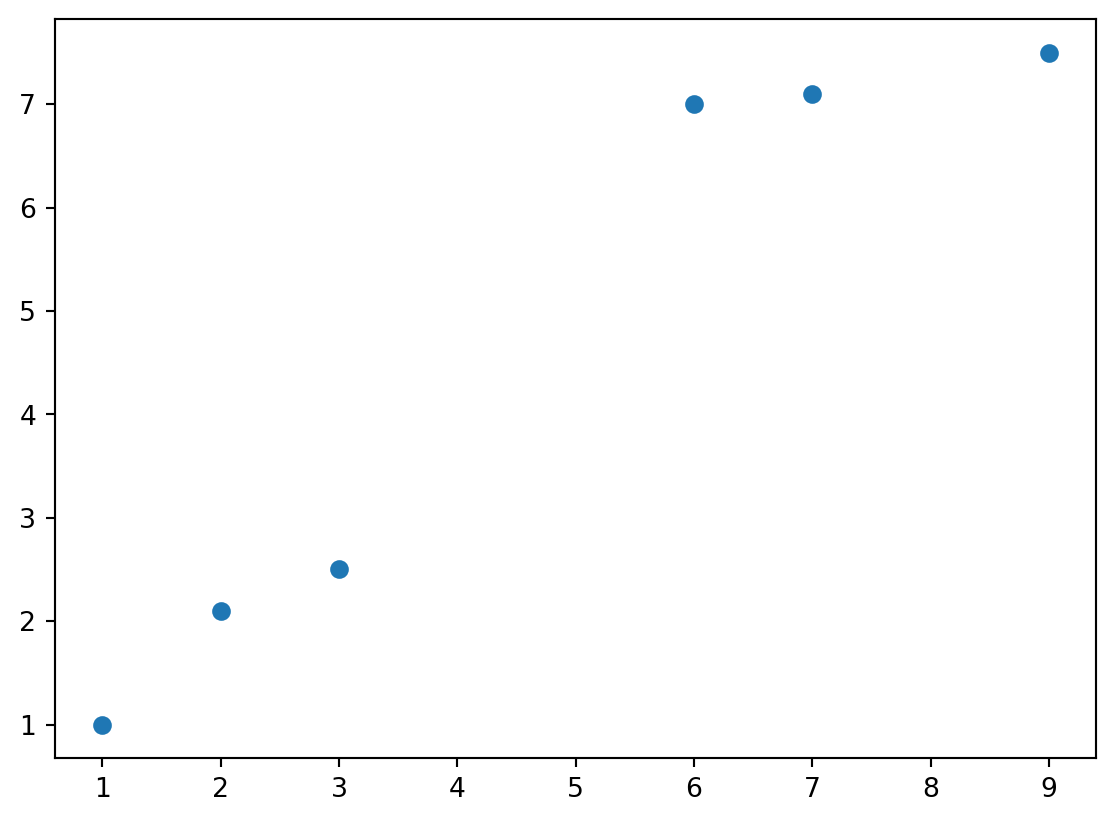

In [2]:
# Visualize the data


import matplotlib.pyplot as plt

plt.scatter([x[0] for x in X],[x[1] for x in X])
plt.show()

In [3]:
# Pure python implementation of K-means clustering
def knn_iter(X,centroids):
    # set up new clusters
    new_clusters=[[] for _ in range(len(centroids))]
    # k=len(centroids)
    # assign each point to the nearest centroid
    for x in X:
        k,distance=0,(x[0]-centroids[0][0])**2+(x[1]-centroids[0][1])**2
        for i,c in enumerate(centroids[1:],1):
            if (x[0]-c[0])**2+(x[1]-c[1])**2<distance:
                k=i
                distance=(x[0]-c[0])**2+(x[1]-c[1])**2
        new_clusters[k].append(x)
    
    # calculate new centroids
    new_centroids=[[
        sum([x[0] for x in cluster])/len(cluster),
        sum([x[1] for x in cluster])/len(cluster)
    ] if cluster else centroids[i] for i,cluster in enumerate(new_clusters)]
    return new_centroids







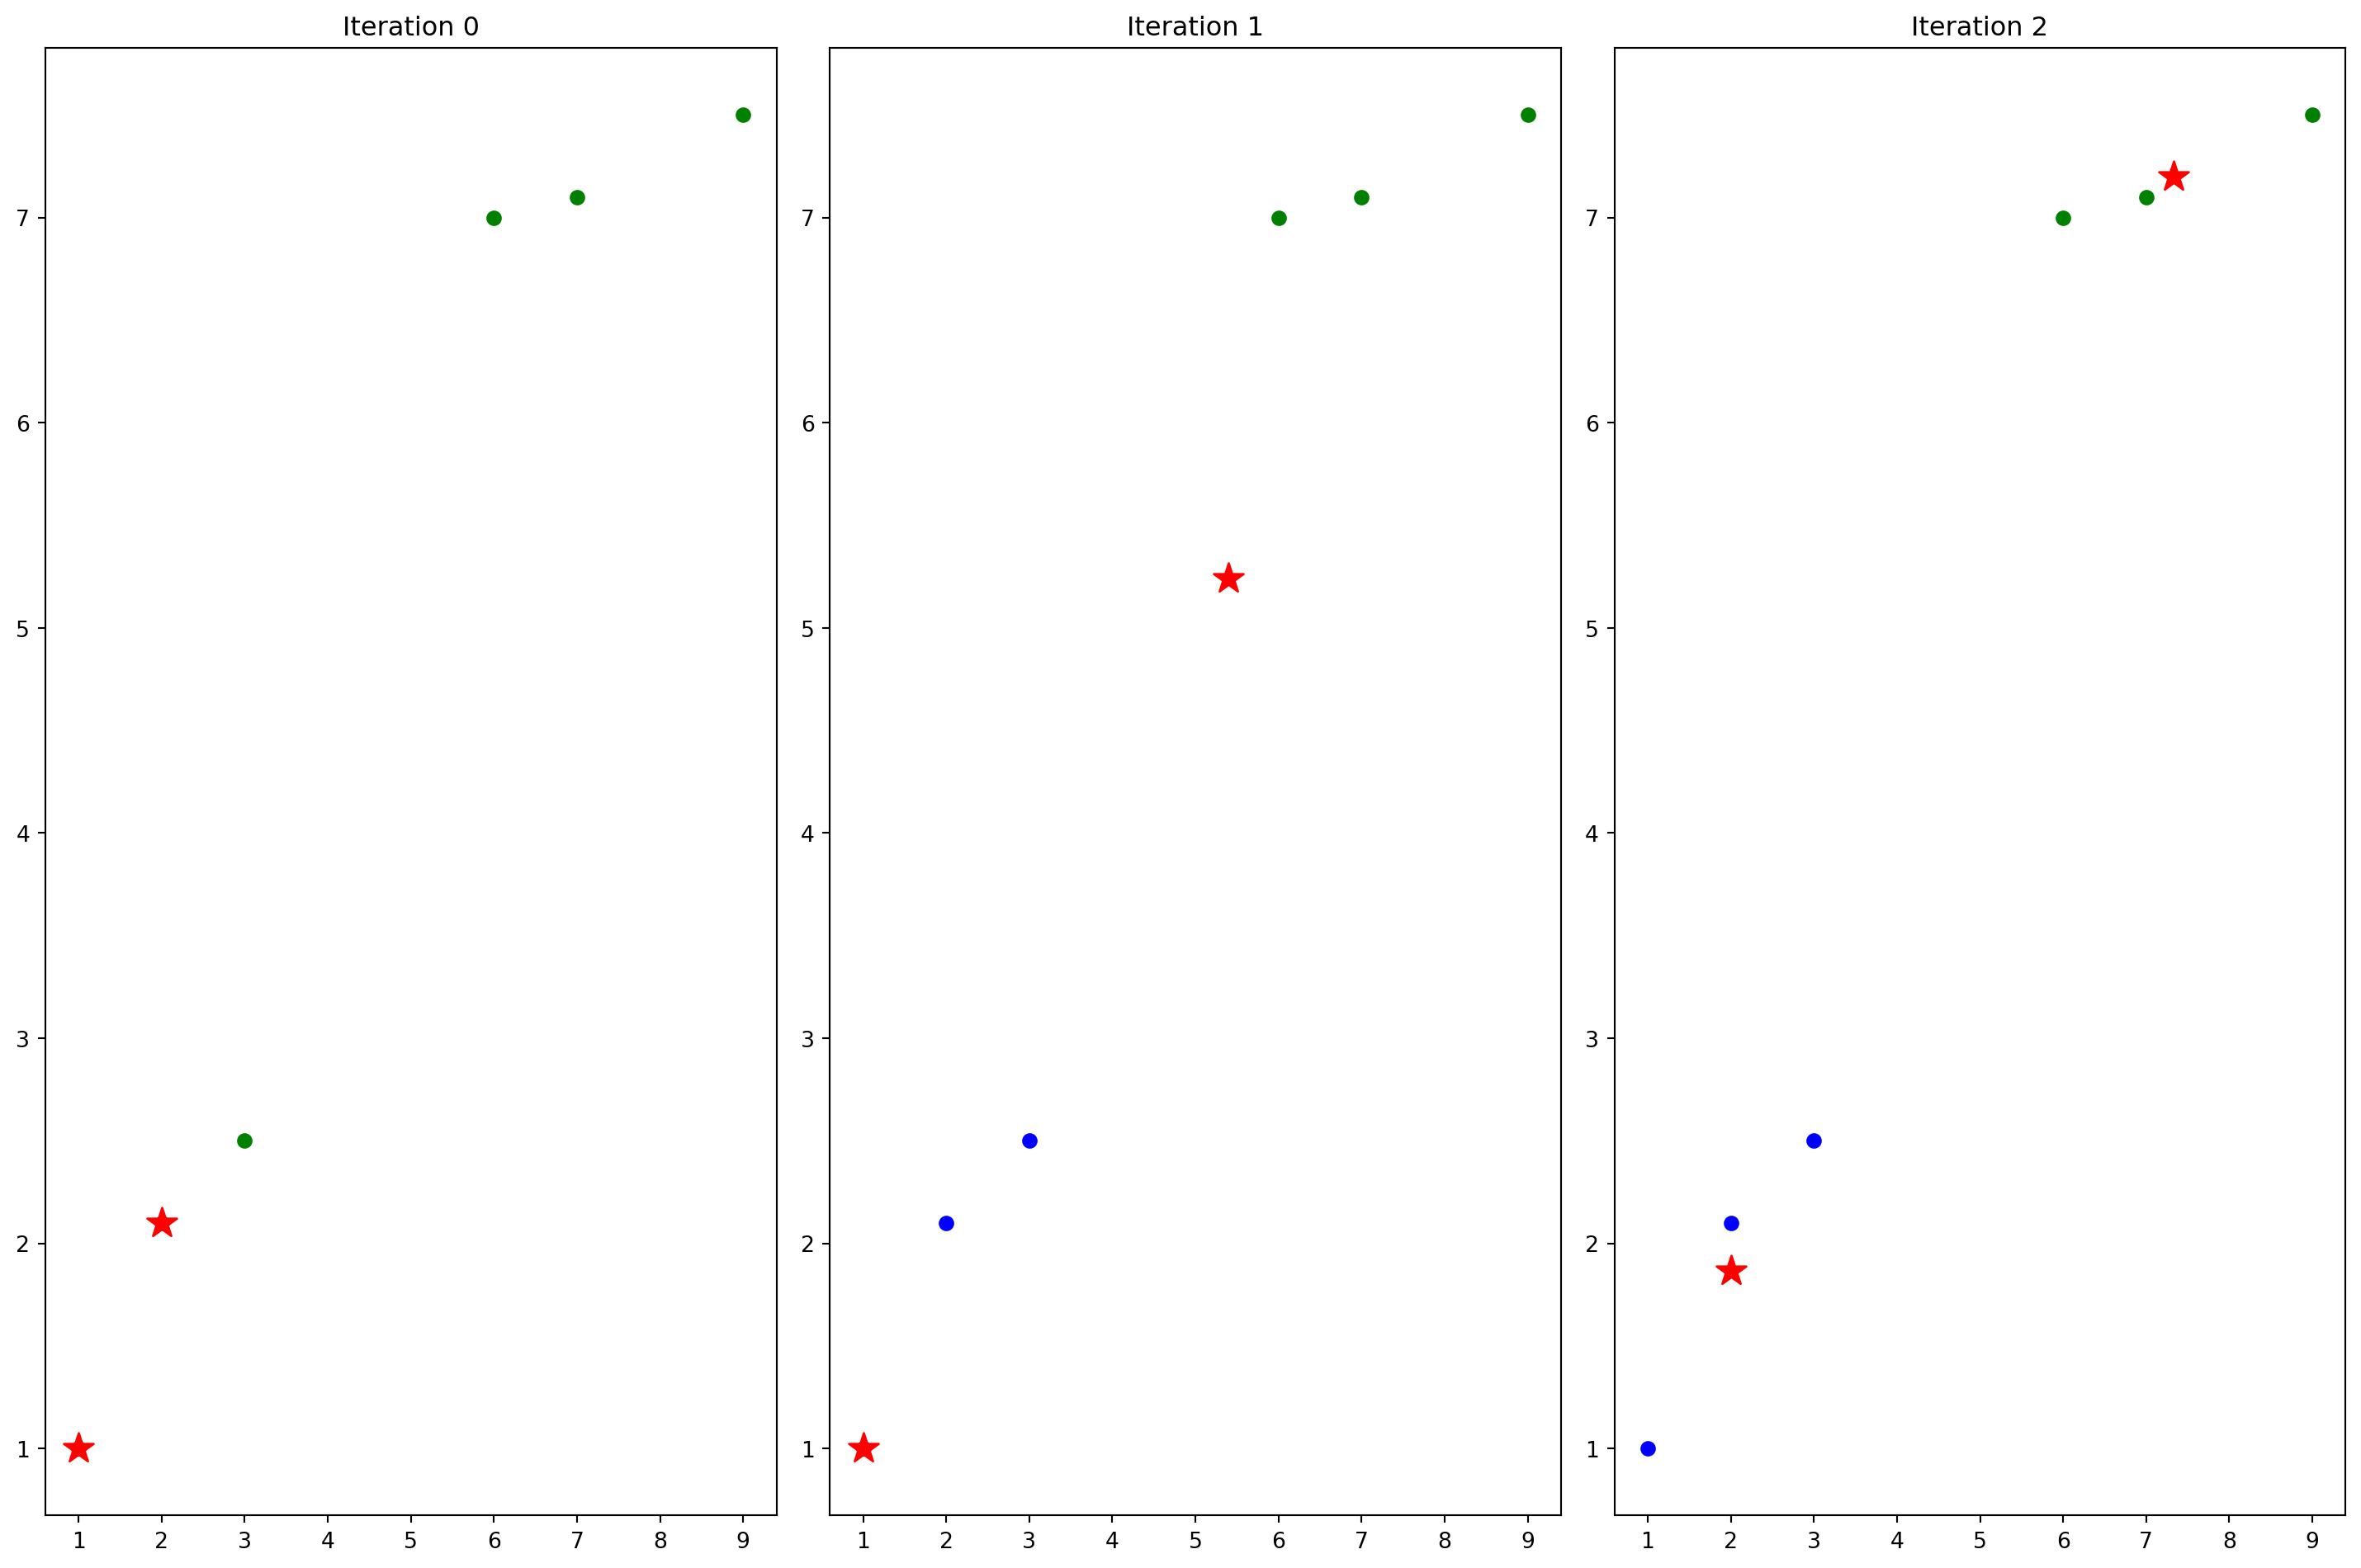

In [4]:

def iter_and_draw(X,k,max_iter):
    centroids=X[:k]  # Randomly select 2 centroids
    fig, axes = plt.subplots(max_iter//3+(1 if max_iter%3!=0 else 0),
        3, figsize=(15, 10))
    axes=axes.flatten()
    for i in range(max_iter):
        
        # Plot points and centroids


        # Assign each point to nearest centroid and plot with corresponding color
        colors = ['blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
        for j, x in enumerate(X):
            # Find nearest centroid
            min_dist = float('inf')
            nearest_centroid = 0
            for k, c in enumerate(centroids):
                dist = (x[0]-c[0])**2 + (x[1]-c[1])**2
                if dist < min_dist:
                    min_dist = dist
                    nearest_centroid = k
            # Plot point with color corresponding to its cluster
            axes[i].scatter(x[0], x[1], c=colors[nearest_centroid % len(colors)], label=f'Cluster {nearest_centroid+1}' if j==0 else "")
        axes[i].scatter([c[0] for c in centroids], [c[1] for c in centroids], c='red', marker='*', s=200, label='Centroids')
        axes[i].set_title(f'Iteration {i}')
        centroids = knn_iter(X, centroids)

    plt.tight_layout()
    plt.show()

iter_and_draw(X,k,max_iter)
# print(centroids)

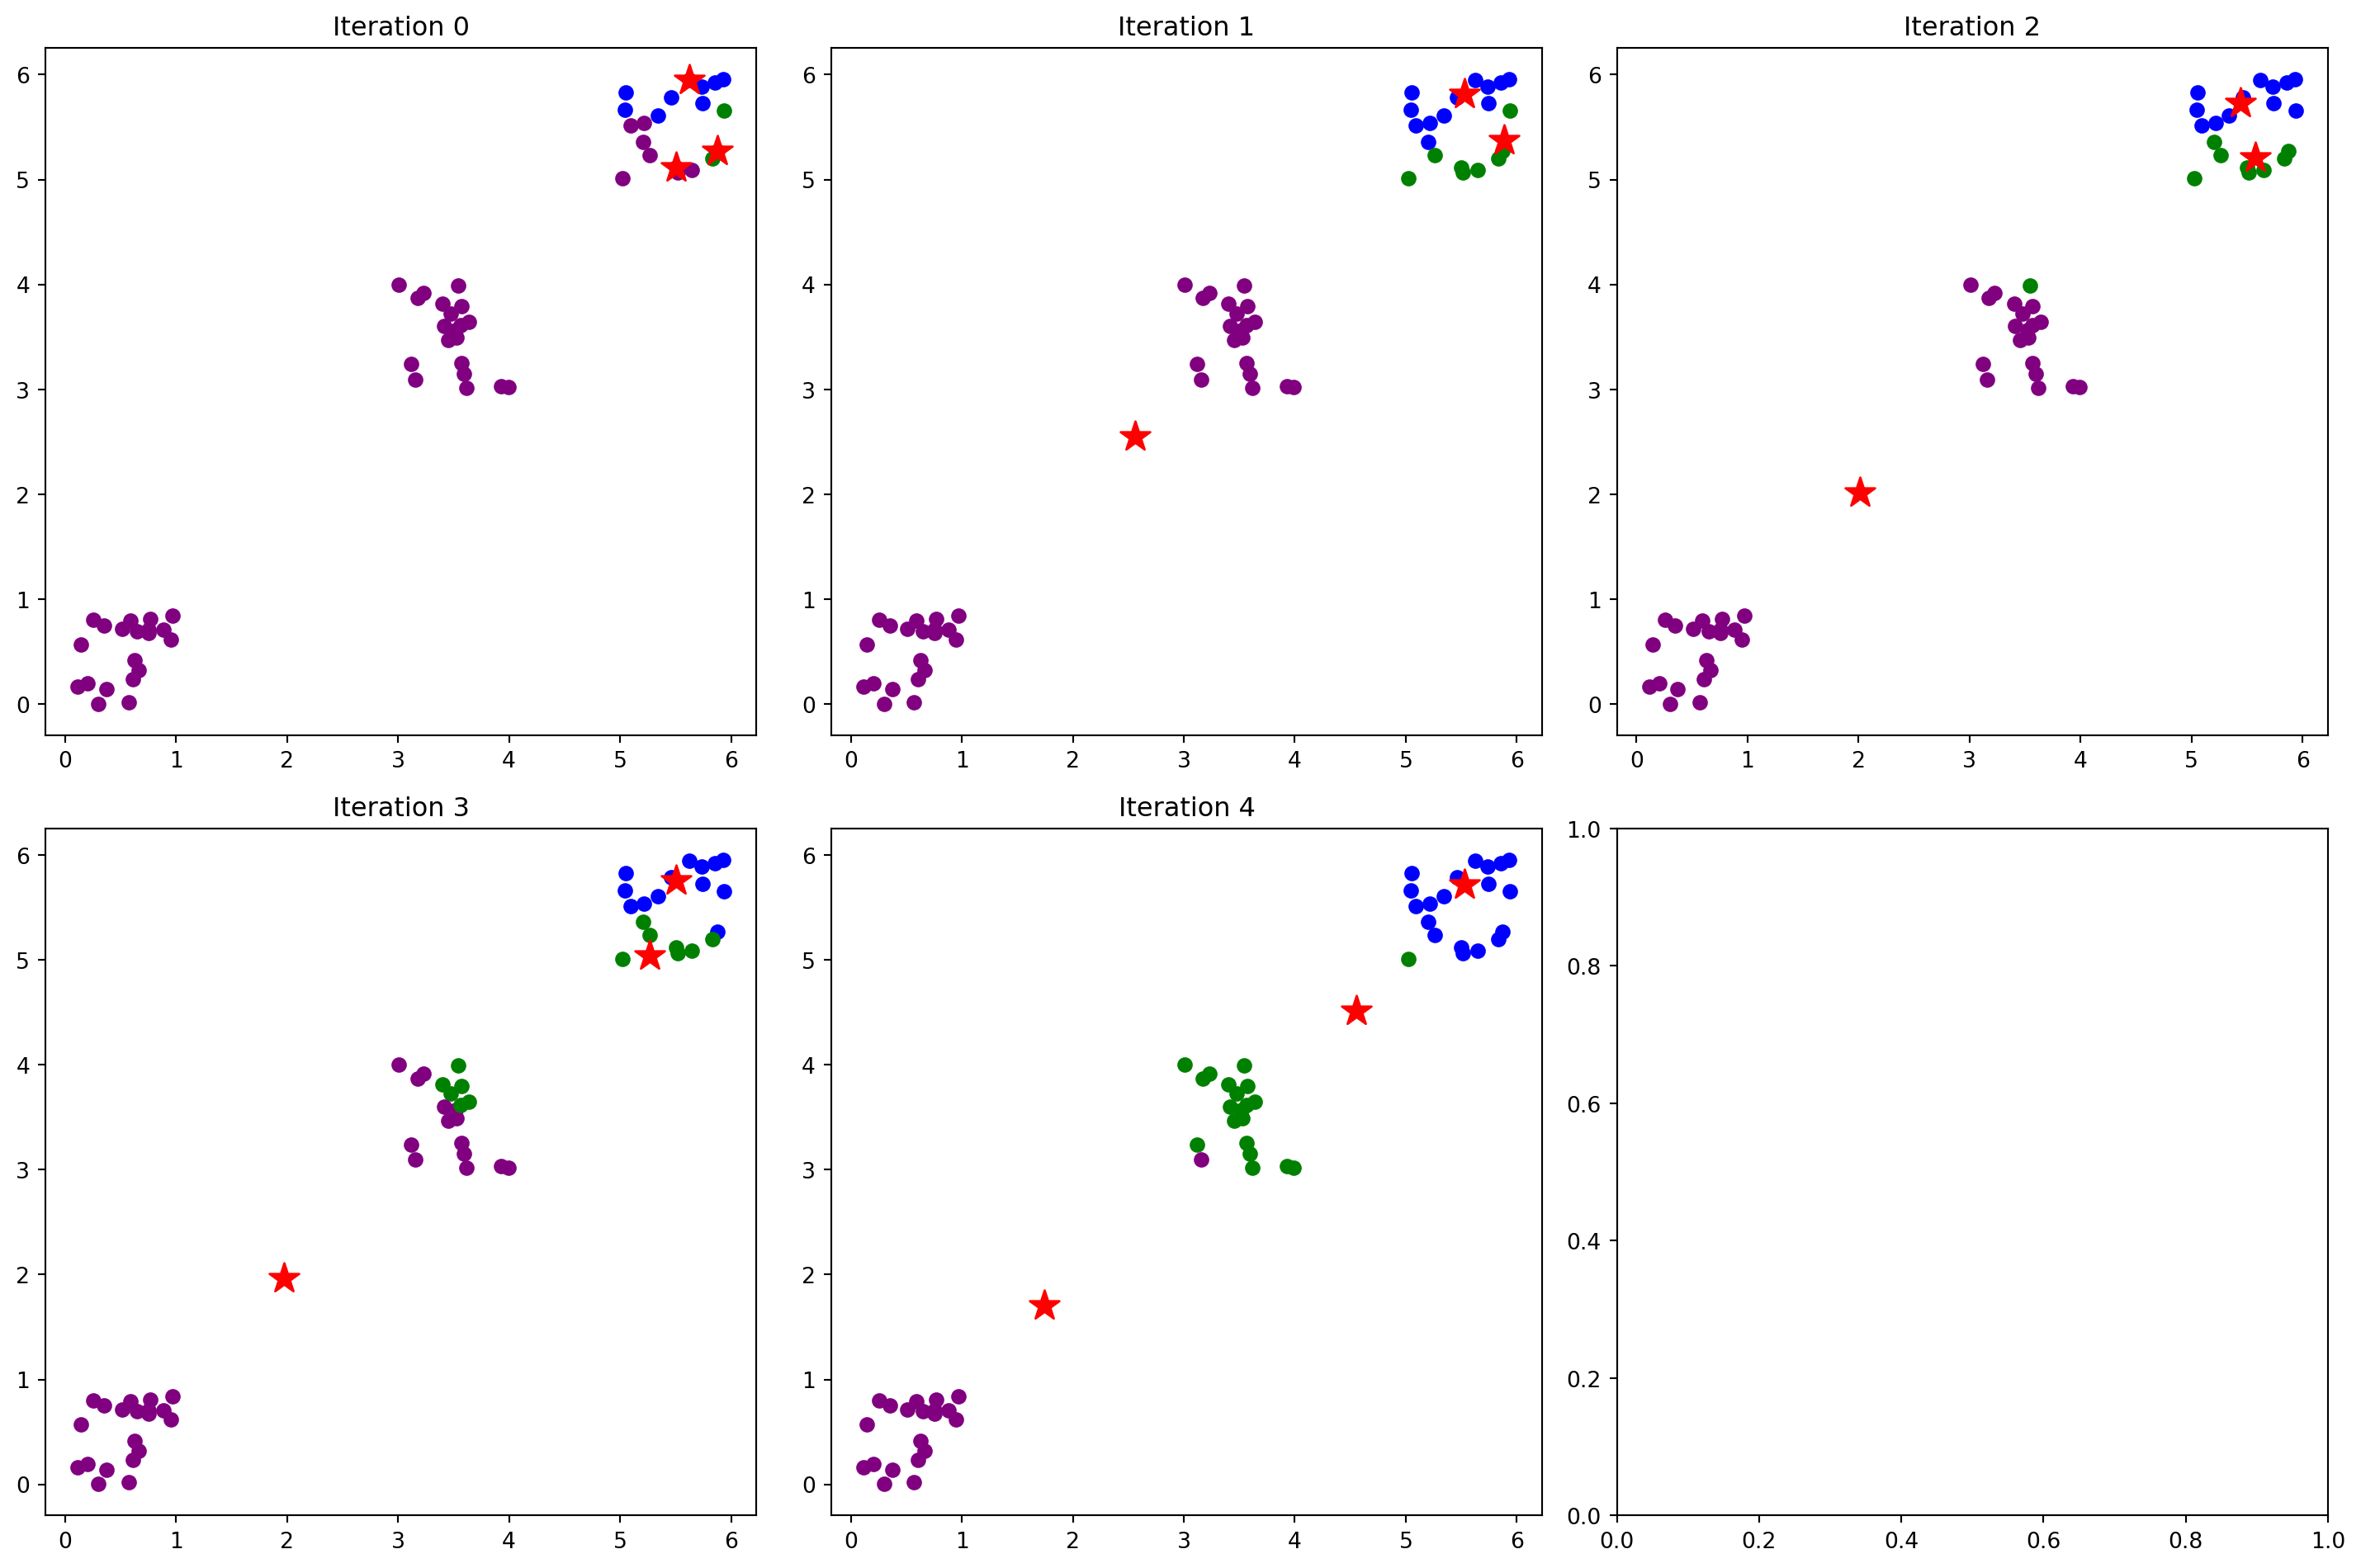

In [5]:
# A 3 clusters example

import numpy as np

X1=np.random.rand(20,2)+5 # Some points in the upper right corner
X2=np.random.rand(20,2)+3 # Some points in the middle
X3=np.random.rand(20,2) # Some points in the lower left corner

iter_and_draw(np.concatenate((X1,X2,X3)),3,5)

# A question?
+ What to do if one cluster has no assigned points during iteration?

# Formula Derivation

The goal is to minimize the loss of inertia which is sum of the points to cluster centroids.

$$
Loss= \sum_{i=1}^n \sum_{x \in C_i} ||x-\mu_i||^2
$$

To iter $\mu$ for each cluster, let us find the derivative of the following function.
$$
f(\mu)=\sum_{i=1}^n ||x_i-\mu||^2 = 
\sum_{i=1}^n {x_i}^2+\mu^2-2x_i\mu
$$

Given a $\nabla \mu$, 
$$
f(\mu + \nabla \mu)=\sum_{i=1}^n ||x_i+\nabla \mu -\mu||^2 = 
\sum_{i=1}^n  {x_i}^2+\mu^2+{\nabla \mu}^2-2{x_i \mu}-2{\mu \nabla \mu}+2{x_i \nabla \mu}
$$

$$
f(\mu + \nabla \mu)-f(\mu)=
\sum_{i=1}^n {\nabla \mu}^2-2{\mu \nabla \mu}+2{x_i \nabla \mu}
$$

$$
\frac {f(\mu + \nabla \mu)-f(\mu)}{\nabla \mu}=\sum_{i=1}^n {\nabla \mu} -2 \mu +2{x_i} = 2\sum_{i=1}^n x_i - 2n\mu
$$

Now we can see if $n\mu = \sum_{i=1}^n x_i$, then the derivative is 0, this is why in each iteration, we need to set the center of the cluster as centroid.